In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import itertools
import statistics

# from tqdm import tnrange, tqdm_notebook


In [2]:
path = '/Volumes/LaCie/school/QLS/choreography_result'

In [ ]:
# nested list of data
from pathlib import Path
from itertools import groupby
from functools import partial

def key(i, file): return file.parent.parts[i]

base = Path("choreography_result")
data = []
for _, group1 in groupby(base.rglob("*.dat"), key=partial(key, 1)):
    data.append([])
    for _, group2 in groupby(group1, key=partial(key, 2)):
        data[-1].append([pd.read_csv(file, header=None, sep=" ") for file in group2])

In [3]:
path = '/Volumes/LaCie/school/QLS/choreography_result'

speed_files = []
x_files = []
y_files = []
for folder in sorted(os.listdir(path)):
    if folder != 'Documentation.txt':
        for subfolder in sorted(os.listdir(path + '/' + folder)):
            if subfolder != '.DS_Store':
                for file in sorted(os.listdir(path+ '/' + folder + '/' + subfolder)):
                    if file.endswith(".speed.dat"):
                        speed_files.append(pd.read_csv((path + '/' + folder + '/' + subfolder + '/' + file), header=None, sep=' '))
                    if file.endswith(".x.dat"):
                        x_files.append(pd.read_csv((path + '/' + folder + '/' + subfolder + '/' + file), header=None, sep=' '))
                    if file.endswith(".y.dat"):
                        y_files.append(pd.read_csv((path + '/' + folder + '/' + subfolder + '/' + file), header=None, sep=' '))

In [4]:
cond1 = speed_files[:20]
cond2 = speed_files[20:40]
cond3 = speed_files[40:60]
cond4 = speed_files[60:80]
cond5 = speed_files[80:100]

cond21 = x_files[:20]
cond22 = x_files[20:40]
cond23 = x_files[40:60]
cond24 = x_files[60:80]
cond25 = x_files[80:100]

cond31 = y_files[:20]
cond32 = y_files[20:40]
cond33 = y_files[40:60]
cond34 = y_files[60:80]
cond35 = y_files[80:100]

In [5]:
def get_data(cond1, cond21, cond31):
    c1_speed = pd.DataFrame(np.concatenate(cond1))
    c1_x = pd.DataFrame(np.concatenate(cond21))
    c1_y = pd.DataFrame(np.concatenate(cond31))
    
    speed = c1_speed.iloc[:, :4]
    x = c1_x.iloc[:, 3]
    data = pd.merge(speed, x, left_index=True, right_index=True)
    y = c1_y.iloc[:, 3]
    data = pd.merge(data, y, left_index=True, right_index=True)
    data.columns = ['session', 'animal', 'time', 'speed', 'x', 'y']
    
    return data

In [6]:
TenGA1 = get_data(cond1, cond21, cond31)
TenGA1

,session,animal,time,speed,x,y
0,20211025_115104,2,0.004,0.0,76.551,151.933
1,20211025_115104,2,0.161,0.646,76.529,151.945
2,20211025_115104,2,0.331,0.857,76.336,151.97
3,20211025_115104,2,0.493,0.788,76.249,152.004
4,20211025_115104,2,0.665,0.967,76.077,152.027
...,...,...,...,...,...,...
4658044,20211117_122326,2539,896.671,1.398,108.662,121.984
4658045,20211117_122326,2539,896.84,0.796,108.602,122.128
4658046,20211117_122326,2539,897.003,1.371,108.53,122.214
4658047,20211117_122326,2539,897.172,0.0,108.354,122.515


In [7]:
TenGA2 = get_data(cond2, cond22, cond32)
TenGA2

,session,animal,time,speed,x,y
0,20211025_113152,2,0.004,0.0,70.306,146.648
1,20211025_113152,2,0.165,1.582,70.058,146.393
2,20211025_113152,2,0.336,0.799,69.973,146.25
3,20211025_113152,2,0.497,0.698,69.96,146.145
4,20211025_113152,2,0.669,0.685,69.959,146.018
...,...,...,...,...,...,...
5177094,20211117_120411,2011,899.668,1.429,122.672,207.733
5177095,20211117_120411,2011,899.831,0.948,122.651,207.526
5177096,20211117_120411,2011,899.992,0.442,122.631,207.428
5177097,20211117_120411,2011,900.163,0.0,122.615,207.386


In [8]:
TenGA3 = get_data(cond3, cond23, cond33)
TenGA3

,session,animal,time,speed,x,y
0,20211026_155429,1,0.005,0.0,47.966,103.422
1,20211026_155429,1,0.132,0.585,47.951,103.351
2,20211026_155429,1,0.297,1.034,47.867,103.28
3,20211026_155429,1,0.47,1.637,47.751,103.06
4,20211026_155429,1,0.633,1.231,47.626,102.788
...,...,...,...,...,...,...
5142106,20211117_113842,2820,899.511,0.223,173.168,254.183
5142107,20211117_113842,2820,899.682,0.793,173.116,254.187
5142108,20211117_113842,2820,899.839,0.823,172.915,254.175
5142109,20211117_113842,2820,900.014,0.0,172.852,254.161


In [9]:
EA = get_data(cond4, cond24, cond34)
EA

,session,animal,time,speed,x,y
0,20211025_102902,1,0.004,0.0,54.639,202.298
1,20211025_102902,1,0.177,1.823,54.417,202.273
2,20211025_102902,1,0.324,1.617,54.075,202.221
3,20211025_102902,1,0.492,0.953,53.928,202.206
4,20211025_102902,1,0.659,1.046,53.758,202.178
...,...,...,...,...,...,...
3569734,20211117_111650,2290,899.676,0.946,10.871,243.25
3569735,20211117_111650,2290,899.825,1.313,10.77,243.457
3569736,20211117_111650,2290,899.995,0.863,10.687,243.621
3569737,20211117_111650,2290,900.157,0.0,10.649,243.718


In [10]:
H2O = get_data(cond5, cond25, cond35)
H2O

,session,animal,time,speed,x,y
0,20211025_101201,1,0.003,0.0,68.378,130.263
1,20211025_101201,1,0.051,0.0,68.333,130.292
2,20211025_101201,1,0.276,1.71,68.114,130.435
3,20211025_101201,1,0.491,1.593,67.673,130.641
4,20211025_101201,1,0.714,0.552,67.491,130.737
...,...,...,...,...,...,...
4263637,20211116_105810,1579,899.601,1.066,2.822,118.369
4263638,20211116_105810,1579,899.765,1.732,2.8,118.615
4263639,20211116_105810,1579,899.93,1.517,2.76,118.935
4263640,20211116_105810,1579,900.099,0.0,2.733,119.115


In [ ]:
TenGA1
TenGA2
TenGA3
EA
H2O

## functions

In [85]:
def get_diff(df):
    dx = (df['x'] - df.groupby('animal')['x'].shift(1))
    dy = (df['y'] - df.groupby('animal')['y'].shift(1))
    df['distance'] = (dx**2 + dy**2)**0.5
    return df

# length = (TenGA1[['y', 'x']] - TenGA1.groupby('animal')[['y', 'x']].shift(1))
# TenGA1['diff'] = np.sqrt((length**2).sum())


def get_startend(df):
    for i in range(len(df)):
        df.loc[df['distance'] > 0.5, 'position'] = 'start'
        df.loc[df['distance'].isnull(), 'position'] = 'start'
    cond = df['position'].shift(-1).str.contains('start').fillna(False)
    df.loc[cond, 'position'] = 'end'
    df['position'].iloc[-1] = 'end'
    return df

def re_center(df):
    df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')
    return df
    
def prep(df):
    df = get_diff(df)
    df = get_startend(df)
    df = re_center(df)
    return df

def rm_centered(df):
    mask = (df['position'] == 'end') & (df['newX'] > -15) & (df['newX'] < 15)
    out = df[~mask.groupby(df['position'].eq('start').cumsum()).transform('max')]
    return out

def StartStop(df):
    x_start, y_start = df.loc[df['position'] == 'start', ['newX', 'newY']].values.T.tolist()
    x_end, y_end = df.loc[df['position'] == 'end', ['newX', 'newY']].values.T.tolist()
    return x_start, y_start, x_end, y_end

def plot_fig(df):
    x_start, y_start, x_end, y_end = StartStop(df)
    
    cmap = cm.get_cmap('rainbow')
    colors = cmap(np.linspace(0, 1, df['animal'].nunique()))
    color_map = dict(zip(df['animal'].unique(), colors))

    # fig, ax = plt.subplots()
    plt.figure(figsize=(10,10))
    for animal, subdf in df.groupby('animal'):
        plt.plot(subdf['newX'], subdf['newY'], marker=',', label=None, c=color_map[animal], linewidth=0.1)
    # ax.legend()

    plt.plot(x_start, y_start, 'og')
    plt.plot(x_end, y_end, 'or')
    plt.show()

In [73]:
TenGA1 = prep(TenGA1)

KeyboardInterrupt: 

In [ ]:
TenGA2 = prep(TenGA2)

In [ ]:
TenGA3 = prep(TenGA3)

In [ ]:
EA = prep(EA)

In [72]:
H2O = prep(H2O)

KeyboardInterrupt: 

In [ ]:
for i in tnrange(len(TenGA1), desc='TenGA1'):
    TenGA1 = get_diff(TenGA1)

In [ ]:
for i in tnrange(len(TenGA2), desc='TenGA2'):
    TenGA2 = prep(TenGA2)

In [ ]:
for i in tnrange(len(TenGA3), desc='TenGA3'):
    TenGA3 = prep(TenGA3)

In [ ]:
for i in tnrange(len(EA), desc='EA'):
    EA = prep(EA)

In [ ]:
for i in tnrange(len(H2O), desc='H2O'):
    H2O = prep(H2O)

In [ ]:
x_start, y_start, x_end, y_end = StartStop(subDF)

In [ ]:
plot_fig(subDF)

# test stuff

In [13]:
# get all sessions from condition 1
TenGA1['session'].unique()

array(['20211025_115104', '20211026_161140', '20211027_125517',
       '20211027_165912', '20211027_173352', '20211028_120724',
       '20211028_144515', '20211029_125354', '20211029_131338',
       '20211102_112325', '20211102_121711', '20211103_183908',
       '20211103_191259', '20211104_145907', '20211104_153210',
       '20211115_145442', '20211115_153001', '20211115_163644',
       '20211116_123528', '20211117_122326'], dtype=object)

In [86]:
# work on session 1 data (just to test stuff)
GA1sesh1 = TenGA1.loc[TenGA1['session'] == '20211025_115104']

In [87]:
GA2sesh1 = TenGA2.loc[TenGA2['session'] == '20211025_113152']

In [88]:
GA3sesh1 = TenGA3.loc[TenGA3['session'] == '20211026_155429']

In [89]:
EAsesh1 = EA.loc[EA['session'] == '20211025_102902']

In [90]:
H2Osesh1 = H2O.loc[H2O['session'] == '20211025_101201']

In [91]:
# GA1sesh1 = prep(GA1sesh1)
# GA1sesh1

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = (dx**2 + dy**2)**0.5


KeyboardInterrupt: 

In [92]:
GA1sesh1 = get_diff(GA1sesh1)
GA1sesh1

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = (dx**2 + dy**2)**0.5


,session,animal,time,speed,x,y,distance,position
0,20211025_115104,2,0.004,0.0,76.551,151.933,NaN,start
1,20211025_115104,2,0.161,0.646,76.529,151.945,0.02506,NaN
2,20211025_115104,2,0.331,0.857,76.336,151.97,0.194612,NaN
3,20211025_115104,2,0.493,0.788,76.249,152.004,0.093408,NaN
4,20211025_115104,2,0.665,0.967,76.077,152.027,0.173531,NaN
...,...,...,...,...,...,...,...,...
168912,20211025_115104,2447,899.658,0.826,187.457,102.077,0.228845,NaN
168913,20211025_115104,2447,899.823,0.648,187.452,102.127,0.050249,NaN
168914,20211025_115104,2447,899.99,1.61,187.341,102.26,0.173234,NaN
168915,20211025_115104,2447,900.156,0.0,187.125,102.551,0.362404,NaN


In [93]:
GA1sesh1 = get_startend(GA1sesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[-1] = 'end'


,session,animal,time,speed,x,y,distance,position
0,20211025_115104,2,0.004,0.0,76.551,151.933,NaN,start
1,20211025_115104,2,0.161,0.646,76.529,151.945,0.02506,NaN
2,20211025_115104,2,0.331,0.857,76.336,151.97,0.194612,NaN
3,20211025_115104,2,0.493,0.788,76.249,152.004,0.093408,NaN
4,20211025_115104,2,0.665,0.967,76.077,152.027,0.173531,NaN
...,...,...,...,...,...,...,...,...
168912,20211025_115104,2447,899.658,0.826,187.457,102.077,0.228845,NaN
168913,20211025_115104,2447,899.823,0.648,187.452,102.127,0.050249,NaN
168914,20211025_115104,2447,899.99,1.61,187.341,102.26,0.173234,NaN
168915,20211025_115104,2447,900.156,0.0,187.125,102.551,0.362404,NaN


In [94]:
GA1sesh1 = re_center(GA1sesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')


In [194]:
def rm_centered(df):
    mask = (df['position'] == 'end') & (df['newX'] > -15) & (df['newX'] < 15)
    out = df[~mask.groupby(df['position'].eq('start').cumsum()).transform('max')]
    return out

In [195]:
GA1sesh1_centered = rm_centered(GA1sesh1)

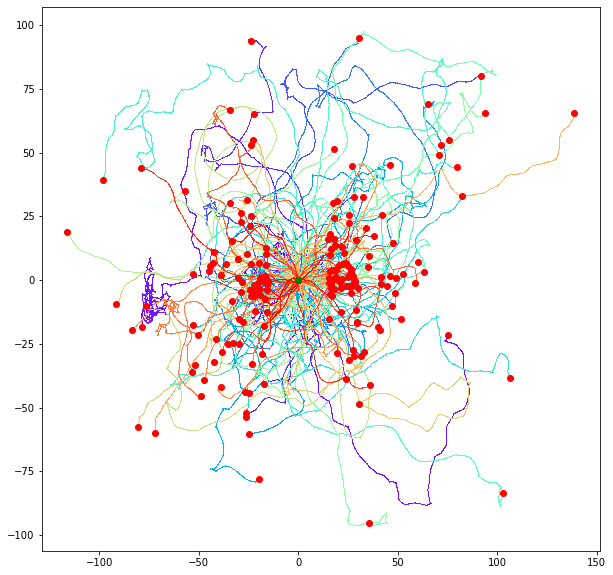

In [196]:
plot_fig(GA1sesh1_centered)

In [119]:
GA2sesh1 = prep(GA2sesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = (dx**2 + dy**2)**0.5
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['distance'] > 0.5, 'position'] = 'start'
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [131]:
GA2sesh1

,session,animal,time,speed,x,y,distance,position,newX,newY
0,20211025_113152,2,0.004,0.0,70.306,146.648,NaN,start,0.0,0.0
1,20211025_113152,2,0.165,1.582,70.058,146.393,0.355709,NaN,-0.248,-0.255
2,20211025_113152,2,0.336,0.799,69.973,146.25,0.166355,NaN,-0.333,-0.398
3,20211025_113152,2,0.497,0.698,69.96,146.145,0.105802,NaN,-0.346,-0.503
4,20211025_113152,2,0.669,0.685,69.959,146.018,0.127004,NaN,-0.347,-0.63
...,...,...,...,...,...,...,...,...,...,...
175084,20211025_113152,3261,899.5,0.365,138.928,133.788,0.032016,NaN,6.086,-7.282
175085,20211025_113152,3261,899.67,0.322,138.998,133.728,0.092195,NaN,6.156,-7.342
175086,20211025_113152,3261,899.832,0.05,139.019,133.727,0.021024,NaN,6.177,-7.343
175087,20211025_113152,3261,900.002,0.0,139.003,133.744,0.023345,NaN,6.161,-7.326


In [197]:
GA2sesh1_center = rm_centered(GA2sesh1)

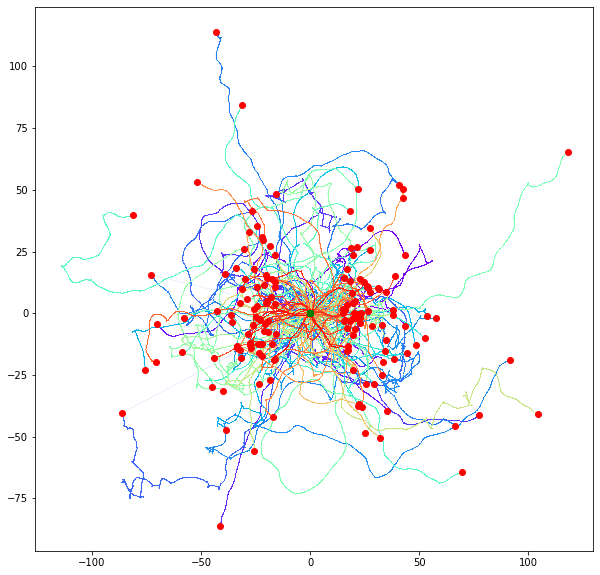

In [198]:
plot_fig(GA2sesh1_center)

In [124]:
GA3sesh1 = get_diff(GA3sesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = (dx**2 + dy**2)**0.5


In [125]:
GA3sesh1 = get_startend(GA3sesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['distance'] > 0.5, 'position'] = 'start'
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[-1] = 'end'


In [126]:
GA3sesh1 = re_center(GA3sesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')


In [199]:
GA3sesh1_centered = rm_centered(GA3sesh1)

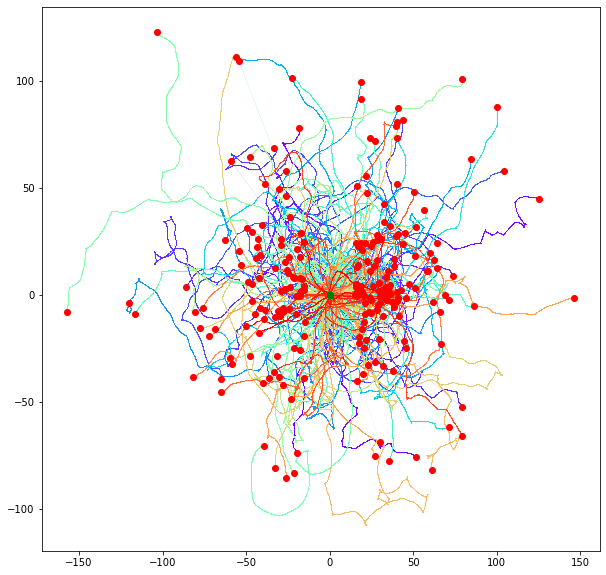

In [200]:
plot_fig(GA3sesh1_centered)

In [133]:
EAsesh1 = get_diff(EAsesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = (dx**2 + dy**2)**0.5


In [134]:
EAsesh1 = get_startend(EAsesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['distance'] > 0.5, 'position'] = 'start'
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[-1] = 'end'


In [135]:
EAsesh1 = re_center(EAsesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')


In [201]:
EAsesh1_centered = rm_centered(EAsesh1)

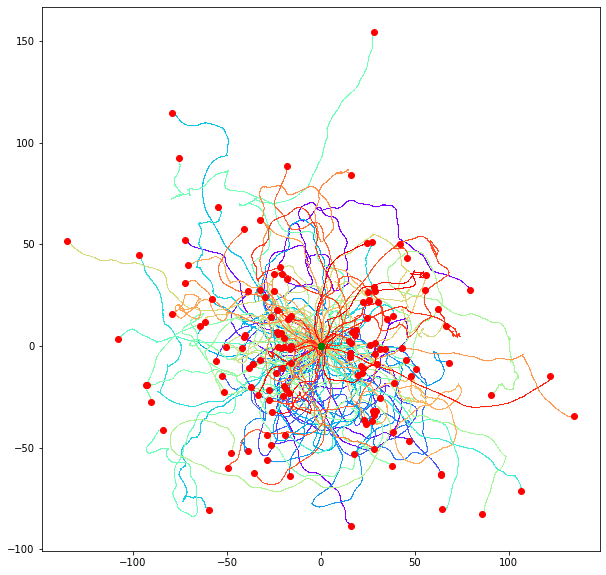

In [202]:
plot_fig(EAsesh1_centered)

In [138]:
H2Osesh1 = get_diff(H2Osesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = (dx**2 + dy**2)**0.5


In [139]:
H2Osesh1 = get_startend(H2Osesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['distance'] > 0.5, 'position'] = 'start'
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'].iloc[-1] = 'end'


In [140]:
H2Osesh1 = re_center(H2Osesh1)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')
/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/1424957967.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['newX', 'newY']] = df[['x', 'y']] - df.groupby(df['position'].eq('start').cumsum())[['x', 'y']].transform('first')


In [203]:
H2Osesh1_centered = rm_centered(H2Osesh1)

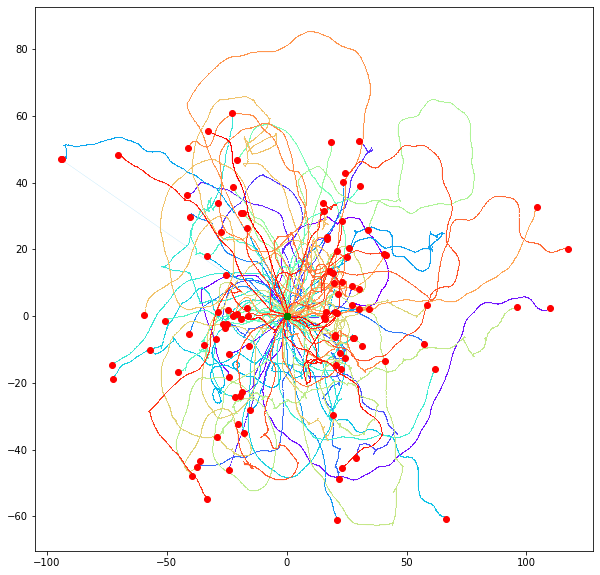

In [204]:
plot_fig(H2Osesh1_centered)

In [ ]:
GA1sesh1_centered
GA2sesh1_center
GA3sesh1_centered
EAsesh1_centered
H2Osesh1_centered

In [155]:
#count how many bugs end in -ve vs. +ve
def areaA(df):
    return len(df[(df['position'] == 'end') & (df['newX'] < 0)])
def areaB(df):
    return len(df[(df['position'] == 'end') & (df['newX'] > 0)])

In [205]:
(areaA(GA1sesh1_centered) - areaB(GA1sesh1_centered)) / (areaA(GA1sesh1_centered) + areaB(GA1sesh1_centered))

-0.09947643979057591

In [206]:
(areaA(GA2sesh1_center) - areaB(GA2sesh1_center)) / (areaA(GA2sesh1_center) + areaB(GA2sesh1_center))

-0.0064516129032258064

In [207]:
(areaA(GA3sesh1_centered) - areaB(GA3sesh1_centered)) / (areaA(GA3sesh1_centered) + areaB(GA3sesh1_centered))

-0.16595744680851063

In [208]:
(areaA(EAsesh1_centered) - areaB(EAsesh1_centered)) / (areaA(EAsesh1_centered) + areaB(EAsesh1_centered))

0.07142857142857142

In [209]:
(areaA(H2Osesh1_centered) - areaB(H2Osesh1_centered)) / (areaA(H2Osesh1_centered) + areaB(H2Osesh1_centered))

-0.02857142857142857

In [210]:
def velocity(df):
    dx = (df['speed'] - df['speed'].shift(-1))
    dt = (df['time'] - df['time'].shift(-1))
    df['velocity'] = dx/dt
    return df

In [240]:
def avg_bug(df):
    return ((df.groupby(df['position'].eq('start').cumsum())[['velocity']].sum())/len(df.groupby(df['position'].eq('start').cumsum())[['velocity']])).values.T.tolist()

In [253]:
GA1sesh1_vel = velocity(GA1sesh1_centered)
GA2sesh1_vel = velocity(GA2sesh1_center)
GA3sesh1_vel = velocity(GA3sesh1_centered)
EAsesh1_vel = velocity(EAsesh1_centered)
H2Osesh1_vel = velocity(H2Osesh1_centered)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/513682236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocity'] = dx/dt


In [267]:
GA1sesh1_vel['V'] = GA1sesh1_vel['velocity'] / (GA1sesh1_vel['speed'])
GA1sesh1_vel

ZeroDivisionError: float division by zero

In [254]:
cond1_vel = statistics.mean(avg_bug(GA1sesh1_vel)[0])
cond2_vel = statistics.mean(avg_bug(GA2sesh1_vel)[0])
cond3_vel = statistics.mean(avg_bug(GA3sesh1_vel)[0])
cond4_vel = statistics.mean(avg_bug(EAsesh1_vel)[0])
cond5_vel = statistics.mean(avg_bug(H2Osesh1_vel)[0])

In [255]:
print(cond1_vel, cond2_vel, cond3_vel, cond4_vel, cond5_vel)

-0.0014993820087783403 0.002003306281921068 0.0017412996877221264 -0.0026112075652991247 -0.0029242204173974703


In [247]:
statistics.mean(bug_vel[0])

0.002003306281921068

In [235]:
# get the sum of velocity for animal 6
GA2sesh1_center.loc[GA2sesh1_center['animal'] == 6]['velocity'].sum()

3.9308387140712333

In [230]:
# get the sum of each trajectory
GA2sesh1_center.groupby(GA2sesh1_center['position'].eq('start').cumsum())[['velocity']].sum()

,velocity
position,
1,3.930839
2,13.600654
3,-12.978918
4,-2.092912
5,-18.030090
...,...
150,0.198950
151,-10.548224
152,15.677678


In [231]:
# number of all unique trajectories
len(GA2sesh1_center.groupby(GA2sesh1_center['position'].eq('start').cumsum())[['velocity']])

154

In [239]:
# verify that some animals have more than one trajectory
len(GA2sesh1_center.loc[GA2sesh1_center['animal'] == 7].groupby(GA2sesh1_center['position'].eq('start').cumsum())[['velocity']])

2

In [211]:
GA1sesh1_vel = velocity(GA2sesh1_center)

/var/folders/hd/7kkcl2qd5xq_6x2gc7_dcj100000gn/T/ipykernel_57412/513682236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['velocity'] = dx/dt


In [212]:
GA1sesh1_vel

,session,animal,time,speed,x,y,distance,position,newX,newY,velocity
478,20211025_113152,6,0.004,0.0,96.633,151.361,NaN,start,0.0,0.0,3.689441
479,20211025_113152,6,0.165,0.594,96.692,151.406,0.074202,NaN,0.059,0.045,0.356725
480,20211025_113152,6,0.336,0.655,96.76,151.514,0.127624,NaN,0.127,0.153,0.89441
481,20211025_113152,6,0.497,0.799,96.824,151.58,0.091935,NaN,0.191,0.219,-1.360465
482,20211025_113152,6,0.669,0.565,96.826,151.775,0.19501,NaN,0.193,0.414,-2.911392
...,...,...,...,...,...,...,...,...,...,...,...
174722,20211025_113152,3251,899.5,0.564,148.166,117.0,0.066008,NaN,16.462,-13.411,3.482353
174723,20211025_113152,3251,899.67,1.156,148.291,116.991,0.125324,NaN,16.587,-13.42,3.765432
174724,20211025_113152,3251,899.832,1.766,148.546,117.021,0.256759,NaN,16.842,-13.39,-10.388235
174725,20211025_113152,3251,900.002,0.0,148.875,117.057,0.330964,NaN,17.171,-13.354,-0.0


In [ ]:
TenGA1

In [ ]:
subDF = TenGA1[:5000]
subDF

In [ ]:
subDF = prep(subDF)
subDF

In [ ]:
from tqdm import tnrange, tqdm_notebook
from time import sleep

In [ ]:
for i in tnrange(4, desc='1st'):
    for j in tnrange(100, desc='2nd'):
        sleep(0.01)

In [ ]:
subDF

In [ ]:
subDF.loc[subDF['distance'] > 0.5].head()

In [ ]:
a2 = TenGA1.loc[TenGA1['animal'] == 2]
a2

In [ ]:
coords = a2[['x', 'y']].values

In [ ]:
coords

In [ ]:
p1, p2 = coords[0], coords[-1]

In [ ]:
p1[0]

In [ ]:
print(p1, p2)

In [ ]:
a2.loc[a2['x'].isin([p1[0], p2[0]]) & a2['y'].isin([p1[1], p2[1]])]

In [ ]:
#get the start and end coordinates
def get_firstlast(animal):
    coords = animal[['x', 'y']].values # get (x, y) coordinates
    p1, p2 = coords[0], coords[-1] # get the first and last coordinates
    
    #return first and last coordinates of animal only
    return animal.loc[animal['x'].isin([p1[0], p2[0]]) & animal['y'].isin([p1[1], p2[1]])]

In [ ]:
# get start and finish coords of each animal
df = [[get_firstlast(subdf)] for animal, subdf in TenGA1.sort_values('time').groupby('animal')]

In [ ]:
#TODO: concat back into dataframe
for i, j in enumerate(df):
    df_new = pd.concat([df[i][0]])

In [ ]:
df

In [ ]:
df = pd.DataFrame({
    'id': [1,1,1,2,2],
    'lat': [41.144540, 41.144540, 41.163172, 41.163233, 41.163198],
    'lon': [-8.562926, -8.562926, -8.583821, -8.583838, -8.583886   ] 
})

df


In [ ]:
coords = df[['lat', 'lon']].values
p1, p2 = coords[0], coords[-1]

In [ ]:
coords

In [ ]:
p1

In [ ]:
TenGA1['animal'].nunique()

In [ ]:
df ={'animal' : [1, 1, 1, 2, 2, 3, 3, 3, 3],
     'x':[76.551, 77.529, 78.336,79.249,  76.077, 77, 78.02, 79.23, 77.733],
     'y': [151.933, 152.945, 153.970, 152.004, 153.027, 119.369, 120.615, 118.935, 119.115],
    'time': [0, 1, 2, 0, 1, 0, 3,2,5]}
df = pd.DataFrame(df)

In [ ]:
# sortdf = df.sort_values('time').groupby('animal')
# sortdf

In [ ]:
df

In [ ]:
# plot animal 2 trajectory only with avg speed

import matplotlib.cm as cm

a = TenGA1.loc[TenGA1['animal'] == 4]

# convert desired columns to arrays
lat_data = a['y'].to_numpy()
long_data = a['x'].to_numpy()
speed = a['speed'].to_numpy()

fig, ax1 = plt.subplots( figsize = ( 10, 10 ) )
minima = min(speed)
maxima = max(speed)

norm = matplotlib.colors.Normalize(vmin=0, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.summer)

pointsPerColor = 1

for x in range(len(lat_data)//pointsPerColor):
    startIndex = x * pointsPerColor
    stopIndex = startIndex + pointsPerColor + 1

    #get color for this section
    avgSpeed = sum(speed[startIndex:stopIndex])/pointsPerColor
    rbga = mapper.to_rgba(avgSpeed)

    #plot section (leng)
    ax1.plot( long_data[startIndex:stopIndex], 
            lat_data[startIndex:stopIndex], 
            alpha=.7,color=rbga )

plt.plot(long_data[0], lat_data[0], 'og')
plt.plot(long_data[-1], lat_data[-1], 'or')
    
plt.colorbar(mapper)
plt.show()


In [ ]:
# find which indices of speed = 0
zeroes = []
for i in range(len(speed)):
    if speed[i] == 0:
        zeroes.append(i)
print(zeroes)

In [ ]:
# small_x = long_data[600:700]
# small_y = lat_data[600:700]
# small_speed = speed[600:700]

fig, ax1 = plt.subplots( figsize = ( 5, 5 ) )
minima = min(small_speed)
maxima = max(small_speed)

norm = matplotlib.colors.Normalize(vmin=0, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.summer)

pointsPerColor = 1

for x in range(len(small_y)//pointsPerColor):
    startIndex = x * pointsPerColor
    stopIndex = startIndex + pointsPerColor + 1

    #get color for this section
    avgSpeed = sum(small_speed[startIndex:stopIndex])/pointsPerColor
    rbga = mapper.to_rgba(avgSpeed)

    #plot section (leng)
    ax1.plot(small_x[startIndex:stopIndex], 
            small_y[startIndex:stopIndex], 
            alpha=.7,color=rbga )

plt.plot(small_x[0], small_y[0], 'og')
plt.plot(small_x[-1], small_y[-1], 'or')
    
plt.colorbar(mapper)
plt.show()



In [ ]:
small_x = np.array([63.266, 63.304, 63.32, 63.393, 63.471, 63.547, 63.589, 63.628,
       63.732, 63.846, 63.911, 63.929, 64.012, 64.113, 64.179, 64.21,
       64.287, 64.424, 64.484, 64.513, 64.619, 64.727, 64.784, 64.82,
       64.9, 64.993, 65.062, 65.109, 65.18, 65.308, 65.415, 65.515,
       65.592, 65.704, 65.887, 65.931, 95.851, 95.837, 95.706, 95.67,
       95.66, 95.565, 95.467, 95.372, 95.316, 95.125, 94.957, 94.817,
       94.765, 94.766, 94.8, 94.762, 94.814, 94.644, 94.577, 94.731,
       94.977, 95.184, 95.263, 95.305, 95.464, 95.519, 95.687, 95.8,
       95.878, 95.944, 96.083, 96.257, 96.511, 96.513, 96.614, 96.863,
       96.972, 96.975, 96.963, 97.003, 97.044, 97.047, 97.088, 97.144,
       97.213, 97.289, 97.163, 97.151, 97.165, 97.262, 97.462, 97.547,
       97.671, 97.853, 97.929, 97.932, 97.999, 98.095, 98.143, 98.155,
       98.225, 98.295, 98.366, 98.417])
small_y = np.array([97.556, 97.633, 97.666, 97.827, 98.027, 98.199, 98.311, 98.409,
       98.648, 98.94, 99.105, 99.168, 99.403, 99.657, 99.824, 99.937,
       100.151, 100.503, 100.648, 100.727, 100.959, 101.232, 101.382,
       101.471, 101.662, 101.896, 102.043, 102.147, 102.255, 102.49,
       102.694, 102.883, 102.989, 103.158, 103.45, 103.533, 183.71,
       183.733, 183.611, 183.551, 183.517, 183.509, 183.539, 183.618,
       183.711, 183.756, 183.853, 183.941, 183.979, 183.997, 183.998,
       184.01, 183.979, 183.986, 184.041, 184.072, 183.949, 183.939,
       183.919, 183.915, 183.987, 183.997, 184.015, 184.086, 184.204,
       184.295, 184.375, 184.533, 184.795, 184.875, 184.944, 185.141,
       185.235, 185.266, 185.276, 185.307, 185.299, 185.279, 185.289,
       185.283, 185.346, 185.554, 185.488, 185.527, 185.584, 185.687,
       185.872, 185.989, 186.24, 186.599, 186.66, 186.789, 186.977,
       187.26, 187.285, 187.239, 187.458, 187.66, 187.821, 187.911])
small_speed = np.array([0.0, 0.359, 0.629, 1.166, 1.247, 0.945, 0.676, 1.089, 1.727,
       1.484, 0.711, 0.962, 1.603, 1.376, 0.0, 1.041, 1.797, 1.576,
       0.738, 1.031, 1.636, 1.352, 0.775, 0.923, 1.422, 1.256, 0.811,
       0.729, 1.179, 1.508, 1.365, 1.027, 0.983, 1.656, 0.0, 0.877, 0.09,
       0.523, 0.735, 0.312, 0.335, 0.582, 0.661, 0.687, 0.844, 1.164,
       1.079, 0.68, 0.238, 0.116, 0.044, 0.072, 0.348, 0.718, 0.381,
       1.167, 1.422, 0.94, 0.368, 0.624, 0.672, 0.676, 0.886, 0.811, 0.77,
       0.8, 1.15, 1.818, 1.314, 0.548, 1.31, 1.373, 0.515, 0.128, 0.154,
       0.254, 0.153, 0.141, 0.291, 0.421, 0.918, 0.44, 0.413, 0.297,
       0.578, 1.211, 1.237, 1.261, 2.063, 1.507, 0.627, 0.964, 1.503,
       1.053, 0.194, 0.56, 1.299, 1.175, 0.856, 0.928])

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
%matplotlib notebook



fig = plt.figure() 
ax = plt.axes(xlim=(75, 80), ylim=(119, 155)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    for animal, subdf in df.sort_values('time').groupby('animal'):
        xdata.append(subdf['x'])
        ydata.append(subdf['y'])
        line.set_data(xdata, ydata) 
        return line, 
	

# setting a title for the plot 
plt.title('') 
# hiding the axis details 
#plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, interval=100, save_count=20) 


# save the animation as mp4 video file 
#anim.save('coil.gif',writer='imagemagick') 

In [ ]:
xdata=[]
ydata=[]
for animal, subdf in df.sort_values('time').groupby('animal'):
        xdata.append(subdf['x'])
        ydata.append(subdf['y'])

In [ ]:
df

In [ ]:
# convert to df
c1_speed = pd.DataFrame(np.concatenate(cond1))
c2_speed = pd.DataFrame(np.concatenate(cond2))
c3_speed = pd.DataFrame(np.concatenate(cond3))
c4_speed = pd.DataFrame(np.concatenate(cond4))
c5_speed = pd.DataFrame(np.concatenate(cond5))

#insert new column
c1_speed.insert(6, 'condition', 'o_five_10n1GA_0s1x900s0s#n#n#n@40')
c2_speed.insert(6, 'condition', 'o_five_10n2GA_0s1x900s0s#n#n#n@40')
c3_speed.insert(6, 'condition', 'o_five_10n3GA_0s1x900s0s#n#n#n@40')
c4_speed.insert(6, 'condition', 'o_five_10n5EA_0s1x900s0s#n#n#n@40')
c5_speed.insert(6, 'condition', 'o_five_H2O_0s1x900s0s#n#n#n@40')

#create one df
all_speed = [c1_speed, c2_speed, c3_speed, c4_speed, c5_speed]
speed = pd.concat(all_speed, ignore_index=True)

speed.columns = ['session', 'animal', 'time', 'speed', 'x', 'y', 'condition', '6', '7']

In [ ]:
c1_x = pd.DataFrame(np.concatenate(cond21))
c2_x = pd.DataFrame(np.concatenate(cond22))
c3_x = pd.DataFrame(np.concatenate(cond23))
c4_x = pd.DataFrame(np.concatenate(cond24))
c5_x = pd.DataFrame(np.concatenate(cond25))

c1_x.insert(4, 'condition', 'o_five_10n1GA_0s1x900s0s#n#n#n@40')
c2_x.insert(4, 'condition', 'o_five_10n2GA_0s1x900s0s#n#n#n@40')
c3_x.insert(4, 'condition', 'o_five_10n3GA_0s1x900s0s#n#n#n@40')
c4_x.insert(4, 'condition', 'o_five_10n5EA_0s1x900s0s#n#n#n@40')
c5_x.insert(4, 'condition', 'o_five_H2O_0s1x900s0s#n#n#n@40')

all_x = [c1_x, c2_x, c3_x, c4_x, c5_x]

x = pd.concat(all_x, ignore_index=True)

x.columns = ['session', 'animal', 'time', 'x', 'condition', 'y', 'speed', '6', '7']

In [ ]:
c1_y = pd.DataFrame(np.concatenate(cond31))
c2_y = pd.DataFrame(np.concatenate(cond32))
c3_y = pd.DataFrame(np.concatenate(cond33))
c4_y = pd.DataFrame(np.concatenate(cond34))
c5_y = pd.DataFrame(np.concatenate(cond35))

c1_y.insert(4, 'condition', 'o_five_10n1GA_0s1x900s0s#n#n#n@40')
c2_y.insert(4, 'condition', 'o_five_10n2GA_0s1x900s0s#n#n#n@40')
c3_y.insert(4, 'condition', 'o_five_10n3GA_0s1x900s0s#n#n#n@40')
c4_y.insert(4, 'condition', 'o_five_10n5EA_0s1x900s0s#n#n#n@40')
c5_y.insert(4, 'condition', 'o_five_H2O_0s1x900s0s#n#n#n@40')

all_y = [c1_y, c2_y, c3_y, c4_y, c5_y]

y = pd.concat(all_y, ignore_index=True)

y.columns = ['session', 'animal', 'time', 'y', 'condition', 'x', 'speed', '6', '7']

In [ ]:
speed

In [ ]:
speed.drop(speed.columns[[4, 5, 7,8]], axis=1, inplace=True) #drop cols by index

In [ ]:
data = pd.merge(speed, x[['x']], left_index=True, right_index=True)

In [ ]:
data = pd.merge(data, y[['y']], left_index=True, right_index=True)

In [ ]:
data

In [ ]:
data.animal.unique()

In [ ]:
data['animal'].value_counts() 

In [ ]:
data[data['animal'] == 1]

In [ ]:
grp = data.groupby(['condition', 'animal'])

In [ ]:
for cond in data['condition'].unique():
    for anim in data['animal'].unique():
        temp = grp.get_group((cond, anim))
            

In [ ]:
temp